In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_feature = pd.read_csv("../예비2 - 변수선택용 proact 데이터/p2_features_combined_with_nans.csv")
df_target = pd.read_csv("../예비2 - 변수선택용 proact 데이터/p2_ALSFRS_slope(target).csv")

In [5]:
df_feature.head()

,Unnamed: 0,SubjectID,Age,Gender,Race,family_ALS_hist,diag_delta,onset_delta,onset_site,if_use_Riluzole,...,bp_d_slope,bp_s_slope,pulse_slope,resp_rate_slope,temp_slope,mean_weight,max_weight,min_weight,slope_weight,mean_BMI
0,0,329,38.0,F,Black,NaN,-1068.0,-1706.0,Limb,NaN,...,NaN,NaN,NaN,-0.138889,-0.001389,50.380000,52.2,45.8,-0.088889,NaN
1,1,533,65.0,F,White,NaN,-44.0,-1023.0,Bulbar,NaN,...,0.021978,-0.043956,0.109890,0.000000,-0.003297,51.000000,52.0,50.5,-0.005495,NaN
2,2,649,48.0,F,White,NaN,NaN,NaN,NaN,Yes,...,0.000000,0.000000,0.196721,0.016393,NaN,74.566667,75.6,73.7,0.011475,0.00299
3,3,708,46.0,M,White,NaN,-986.0,-1070.0,Bulbar,NaN,...,NaN,NaN,NaN,0.021978,-0.012088,60.450000,63.8,53.9,-0.108791,NaN
4,4,902,77.0,F,Unknown,NaN,-49.0,-514.0,Limb,Yes,...,0.000000,-0.164835,-0.087912,0.043956,0.003297,62.220000,63.5,61.7,-0.019780,0.00239


In [6]:
print("Our df has a total of {} null values".format(df_feature.isnull().sum().sum()))
print()

Our df has a total of 208682 null values



The column Age has 2070 null values. It is 23.43% of total rows.
The column Age is of type float64.

The column Gender has 2070 null values. It is 23.43% of total rows.
The column Gender is of type object.

The column Race has 2070 null values. It is 23.43% of total rows.
The column Race is of type object.

The column family_ALS_hist has 8248 null values. It is 93.36% of total rows.
The column family_ALS_hist is of type object.

The column diag_delta has 5906 null values. It is 66.85% of total rows.
The column diag_delta is of type float64.

The column onset_delta has 5906 null values. It is 66.85% of total rows.
The column onset_delta is of type float64.

The column onset_site has 5907 null values. It is 66.86% of total rows.
The column onset_site is of type object.

The column if_use_Riluzole has 1569 null values. It is 17.76% of total rows.
The column if_use_Riluzole is of type object.

The column treatment_group has 852 null values. It is 9.64% of total rows.
The column treatment_g

['family_ALS_hist',
 'diag_delta',
 'onset_delta',
 'onset_site',
 'svc_slope',
 'svc_mean',
 'svc_min',
 'svc_max',
 'mean_temp',
 'max_temp',
 'min_temp',
 'temp_slope',
 'mean_BMI']

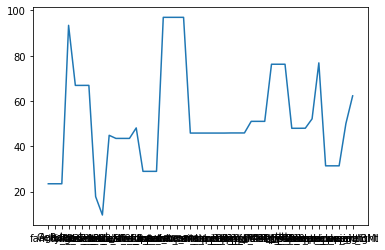

In [9]:
def report_nulls(df):
    '''
    Show a fast report of the DF.
    '''
    rows = df.shape[0]
    columns = df.shape[1]
    null_cols = 0
    list_of_nulls_cols = []
    list_of_nulls_cols_pcn = []
    list_of_nulls_cols_over60 = []
    for col in list(df.columns):
        null_values_rows = df[col].isnull().sum()
        null_rows_pcn = round(((null_values_rows)/rows)*100, 2)
        col_type = df[col].dtype
        if null_values_rows > 0:
            print("The column {} has {} null values. It is {}% of total rows.".format(col, null_values_rows, null_rows_pcn))
            print("The column {} is of type {}.\n".format(col, col_type))
            null_cols += 1
            list_of_nulls_cols.append(col)
            list_of_nulls_cols_pcn.append(null_rows_pcn)
            if null_rows_pcn > 60:
                list_of_nulls_cols_over60.append(col)
    null_cols_pcn = round((null_cols/columns)*100, 2)
    print("The DataFrame has {} columns with null values. It is {}% of total columns.".format(null_cols, null_cols_pcn))
    plt.plot(list_of_nulls_cols, list_of_nulls_cols_pcn)
    return list_of_nulls_cols_over60

report_nulls(df_feature)

In [10]:
extent = list(df_target["SubjectID"].unique())
df_feature.query("SubjectID == {0}".format(extent), inplace=True)

In [11]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2281 entries, 1 to 6760
Data columns (total 48 columns):
Unnamed: 0            2281 non-null int64
SubjectID             2281 non-null int64
Age                   2281 non-null float64
Gender                2281 non-null object
Race                  2281 non-null object
family_ALS_hist       380 non-null object
diag_delta            876 non-null float64
onset_delta           876 non-null float64
onset_site            876 non-null object
if_use_Riluzole       1982 non-null object
treatment_group       2095 non-null object
alsfrs_total_slope    2279 non-null float64
mean_alsfrs_total     2281 non-null float64
min_alsfrs_total      2281 non-null float64
max_alsfrs_total      2281 non-null float64
fvc_slope             2064 non-null float64
fvc_mean              2081 non-null float64
fvc_min               2081 non-null float64
fvc_max               2081 non-null float64
svc_slope             198 non-null float64
svc_mean              198 no

The column family_ALS_hist has 1901 null values. It is 83.34% of total rows.
The column family_ALS_hist is of type object.

The column diag_delta has 1405 null values. It is 61.6% of total rows.
The column diag_delta is of type float64.

The column onset_delta has 1405 null values. It is 61.6% of total rows.
The column onset_delta is of type float64.

The column onset_site has 1405 null values. It is 61.6% of total rows.
The column onset_site is of type object.

The column if_use_Riluzole has 299 null values. It is 13.11% of total rows.
The column if_use_Riluzole is of type object.

The column treatment_group has 186 null values. It is 8.15% of total rows.
The column treatment_group is of type object.

The column alsfrs_total_slope has 2 null values. It is 0.09% of total rows.
The column alsfrs_total_slope is of type float64.

The column fvc_slope has 217 null values. It is 9.51% of total rows.
The column fvc_slope is of type float64.

The column fvc_mean has 200 null values. It is 8.7

['family_ALS_hist',
 'diag_delta',
 'onset_delta',
 'onset_site',
 'svc_slope',
 'svc_mean',
 'svc_min',
 'svc_max',
 'mean_temp',
 'max_temp',
 'min_temp',
 'temp_slope']

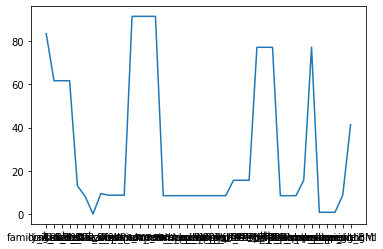

In [12]:
def report_nulls(df):
    '''
    Show a fast report of the DF.
    '''
    rows = df.shape[0]
    columns = df.shape[1]
    null_cols = 0
    list_of_nulls_cols = []
    list_of_nulls_cols_pcn = []
    list_of_nulls_cols_over60 = []
    for col in list(df.columns):
        null_values_rows = df[col].isnull().sum()
        null_rows_pcn = round(((null_values_rows)/rows)*100, 2)
        col_type = df[col].dtype
        if null_values_rows > 0:
            print("The column {} has {} null values. It is {}% of total rows.".format(col, null_values_rows, null_rows_pcn))
            print("The column {} is of type {}.\n".format(col, col_type))
            null_cols += 1
            list_of_nulls_cols.append(col)
            list_of_nulls_cols_pcn.append(null_rows_pcn)
            if null_rows_pcn > 60:
                list_of_nulls_cols_over60.append(col)
    null_cols_pcn = round((null_cols/columns)*100, 2)
    print("The DataFrame has {} columns with null values. It is {}% of total columns.".format(null_cols, null_cols_pcn))
    plt.plot(list_of_nulls_cols, list_of_nulls_cols_pcn)
    return list_of_nulls_cols_over60

report_nulls(df_feature)